<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/multiUntitled19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Procedure Intuition
Initialization (weights, intercept, learning rate, iteration)
Binarize target labels
Prepare linear equation function for each class
Predict each instance (observation) using all linear equations (plug in initial weights and intercept, usually zeros)
Apply sigmoid function to the predicted outputs
Calculate the cost function (log loss/binary cross entropy)
Calculate gradient of the cost function with respect to weights and intercept
Update weights and intercept using the calculated gradients and initialized learning rate
Keep iterating until we find the best loss or accuracy or whatever metric you prefer

step 3: preparing functions

predict (linear equation as in linear regression)


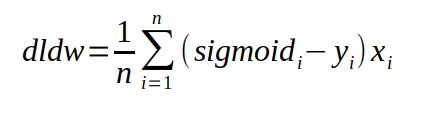

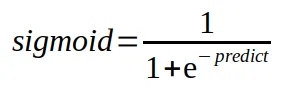

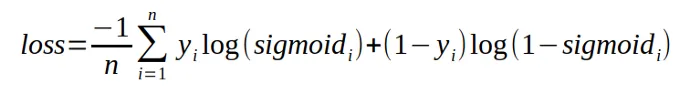

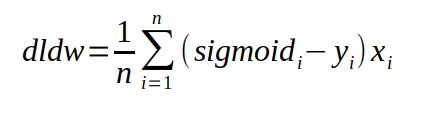

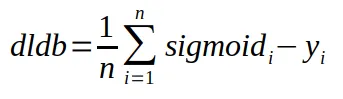

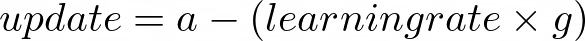

In [1]:
from collections import Counter
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [3]:
df = pd.DataFrame(x,columns = ['x1','x2','x3','x4'])
df['y'] = y
df.head()

,x1,x2,x3,x4,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
learning_rate = 0.1
n_iter = 500
ws,bs = [],[]

In [5]:
encoder = LabelBinarizer()
y_oh = encoder.fit_transform(y)
y_oh

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [6]:
predict = lambda x, w, b: np.matmul(w,x.T) + b
sigmoid = lambda yhat: 1/(1+np.exp(-yhat))
loss = lambda y, sig: -(y*np.log(sig)+(1-y)*np.log(1-sig)).mean()
dldw = lambda x, y, sig: (np.reshape(sig-y,(x.shape[0],1))*x).mean(axis = 0)
dldb = lambda y, sig: (sig-y).mean(axis = 0)
update = lambda w, grad, lr: w-(grad*lr)

let’s try doing for the first class (class 0). To get the target label of class 0 we use y_oh[:,0]. So that it is easier later on, let’s have variable “c” to contain the class number.

In [7]:
c = 0
b = 0
w = np.zeros(x.shape[1])
for i in range(n_iter):
    yhat = predict(x,w,b)
    sig = sigmoid(yhat)
    grad_w = dldw(x,y_oh[:,c],sig)
    grad_b = dldb(y_oh[:,c],sig)
    w = update(w,grad_w,learning_rate)
    b = update(b,grad_b,learning_rate)
ws.append(w)
bs.append(b)

we modify the code a little by putting it in a loop so that it will do for the whole class.

In [8]:
for c in range(len(Counter(y))):
    b = 0
    w = np.zeros(x.shape[1])
    for i in range(n_iter):
        yhat = predict(x,w,b)
        sig = sigmoid(yhat)
        grad_w = dldw(x,y_oh[:,c],sig)
        grad_b = dldb(y_oh[:,c],sig)
        w = update(w,grad_w,learning_rate)
        b = update(b,grad_b,learning_rate)
    ws.append(w)
    bs.append(b)

step 5: making predictions

In essence, to make predictions or to use it for new data, we use predict function on all n number of models’ classes. next apply sigmoid function on the ouputs. lastly take the class index where probability is the highest using np.argmax function.

first we initialize a list to contain the probabilites of all classes. second we initialize a loop for all classes from 0 to 2. third get the probabilites by using predict then sigmoid functions, this will return an array. fourth append that array of proabilities to our “sigs” list. lastly apply argmax function to find class with highest probability

In [9]:
sigs = []
for c in range(len(Counter(y))):
    yhat = predict(x,ws[c],bs[c])
    sig = sigmoid(yhat)
    sigs.append(sig)
y_pred = np.argmax(sigs,axis = 0)

step 6: evaluate

This evaluation part is just to confirm whether or not we have a valid model, since we made it from scratch. therefore I am just going to use the “x” data we used in the training, since I did not split the data. You can split the data before hand and use the test set in this part if you wish.

our from-scratch multi-class logistic regression model classification report

In [10]:
classRep = classification_report(y,y_pred)
print(classRep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.00      0.00      0.00        50
           2       0.50      1.00      0.67        50

    accuracy                           0.67       150
   macro avg       0.50      0.67      0.56       150
weighted avg       0.50      0.67      0.56       150



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


scikit-learn’s multi-class logistic regression model classification report

In [11]:
lrsk = LogisticRegression()
lrsk.fit(x,y)
y_pred = lrsk.predict(x)
classRep = classification_report(y,y_pred)
print(classRep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
